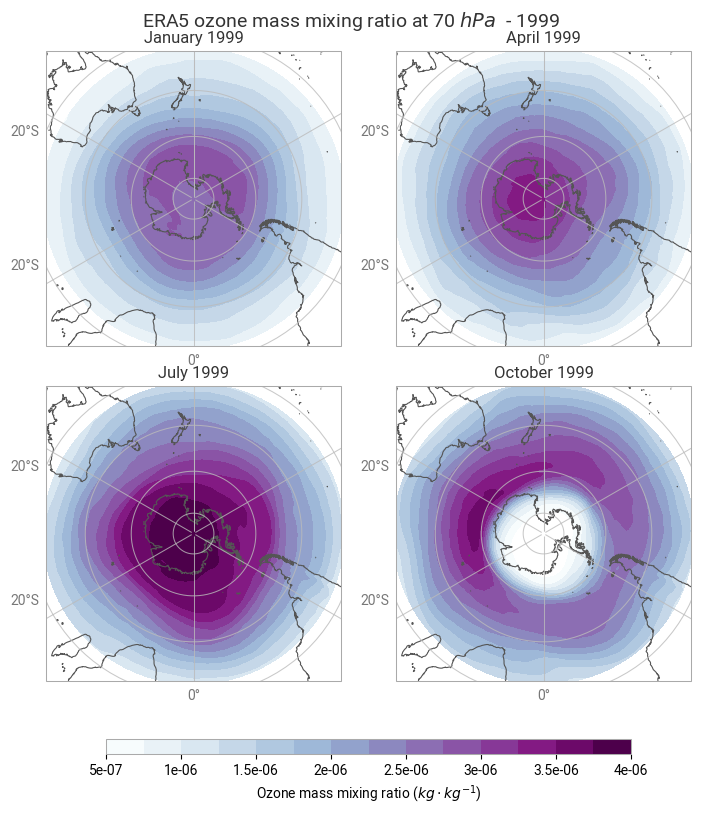

In [1]:
import earthkit.data
import earthkit.plots

import cartopy.crs as ccrs
import numpy as np

data = earthkit.data.from_source(
    "url",
    "https://get.ecmwf.int/repository/test-data/metview/gallery/era5_ozone_1999.nc",
)

style = earthkit.plots.styles.Style(
    levels = np.arange(5e-7, 4.1e-6, 2.5e-7),
    colors="BuPu",
)

DOMAIN = earthkit.plots.geo.domains.Domain(
    [-180, 180, -90, -25],
    crs=ccrs.PlateCarree(),
)

CRS = crs=ccrs.SouthPolarStereo(central_longitude=180)

fig = earthkit.plots.Figure(rows=2, columns=2, size=(7, 8))

for datum in data:
    fig.add_map(domain=DOMAIN, crs=CRS).contourf(datum, style=style)

fig.coastlines()
fig.gridlines()

fig.legend()

fig.title("ERA5 {variable_name!l} at 70 $hPa$  - {time:%Y}", fontsize=14)
fig.subplot_titles("{time:%B %Y}")

fig.show()